# Problem #1
Download the data set adult-modified.csv and load it into an appropriate data structure such as a Pandas dataframe. Explore the general characteristics of the data as a whole: examine the means, standard deviations, and other statistics associated with the numeric attributes and frequencies associated with categorical attributes.

In [1]:
import n as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
adult_census = pd.read_csv("adult-modified.csv")
adult_census.head(5)

,age,workclass,education,marital-status,race,sex,hours-per-week,income
0,39,Public,13,Single,White,Male,40,<=50K
1,50,Self-emp,13,Married,White,Male,13,<=50K
2,38,Private,9,Single,White,Male,40,<=50K
3,53,Private,7,Married,Black,Male,40,<=50K
4,28,Private,13,Married,Black,Female,40,<=50K


In [7]:
adult_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9412 entries, 0 to 9411
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             9412 non-null   int64 
 1   workclass       9412 non-null   object
 2   education       9412 non-null   int64 
 3   marital-status  9412 non-null   object
 4   race            9412 non-null   object
 5   sex             9412 non-null   object
 6   hours-per-week  9412 non-null   int64 
 7   income          9412 non-null   object
dtypes: int64(3), object(5)
memory usage: 588.4+ KB


In [12]:
adult_census.describe(include="all")

,age,workclass,education,marital-status,race,sex,hours-per-week,income
count,9412.000000,9412,9412.000000,9412,9412,9412,9412.000000,9412
unique,NaN,3,NaN,2,5,2,NaN,2
top,NaN,Private,NaN,Married,White,Male,NaN,<=50K
freq,NaN,6947,NaN,4737,8062,6383,NaN,7093
mean,38.357310,NaN,10.125266,NaN,NaN,NaN,41.080217,NaN
std,12.962135,NaN,2.542118,NaN,NaN,NaN,11.884590,NaN
min,17.000000,NaN,1.000000,NaN,NaN,NaN,1.000000,NaN
25%,28.000000,NaN,9.000000,NaN,NaN,NaN,40.000000,NaN
50%,37.000000,NaN,10.000000,NaN,NaN,NaN,40.000000,NaN
75%,47.000000,NaN,13.000000,NaN,NaN,NaN,45.000000,NaN


### Summary
Looking at the above info function, we can see that there are 9,412 observations in this dataset, with 8 different attributes. Age, education, and hours-per-week are all numerical fields, while the other 5 are categorical variables. From the describe function, we use the include="all" so we can investigate the categorical variables too, and can see the means, standard deviations, minimums, maximums, and quartiles for the numerical variables. For the categorical variables, we can see the unique values for each respectively (workclass=3, marital-status=2, race=5, sex=2, income=2), as well as the most common category along with its frequency count.

# Problem #2
For the three numeric attributes (age, hours-per-week, education), display box plots that show the overall dispersion and skew in these variables. Next, create histograms for these three variables showing the overall data distribution in each. Finally, display a scatter plot of age (x-axis) vs. hours-per-week (y-axis).

In [14]:
census_num = adult_census[["age","hours-per-week","education"]]
census_num.head()

,age,hours-per-week,education
0,39,40,13
1,50,13,13
2,38,40,9
3,53,40,7
4,28,40,13


### Boxplots

<AxesSubplot:title={'center':'Boxplot - Adult Census Education Level'}, ylabel='Education Level'>

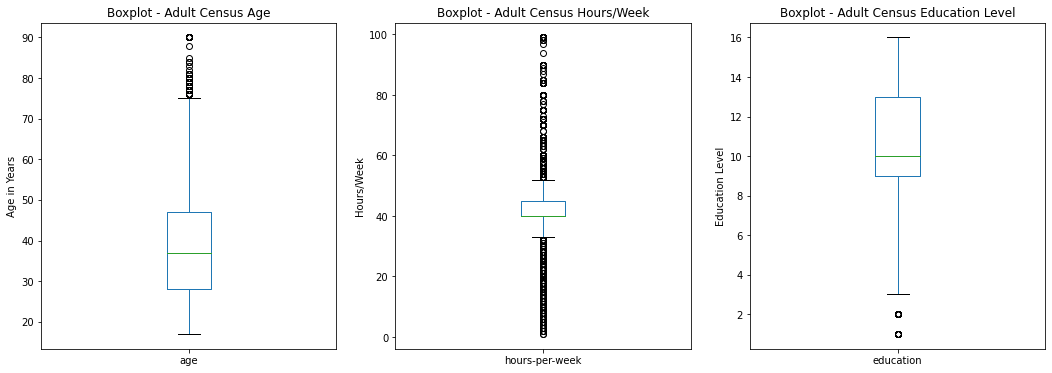

In [42]:
fig = plt.figure(figsize=(18,6))
ax1 = fig.add_subplot(131)
ax1.set_ylabel('Age in Years')
ax1.set_title('Boxplot - Adult Census Age')
census_num.boxplot(column='age', grid=False)

ax1 = fig.add_subplot(132)
ax1.set_ylabel('Hours/Week')
ax1.set_title('Boxplot - Adult Census Hours/Week')
census_num.boxplot(column='hours-per-week', grid=False)

ax1 = fig.add_subplot(133)
ax1.set_ylabel('Education Level')
ax1.set_title('Boxplot - Adult Census Education Level')
census_num.boxplot(column='education', grid=False)

### Histograms

<AxesSubplot:title={'center':'Histogram - Adult Census Education Level'}, ylabel='Frequency'>

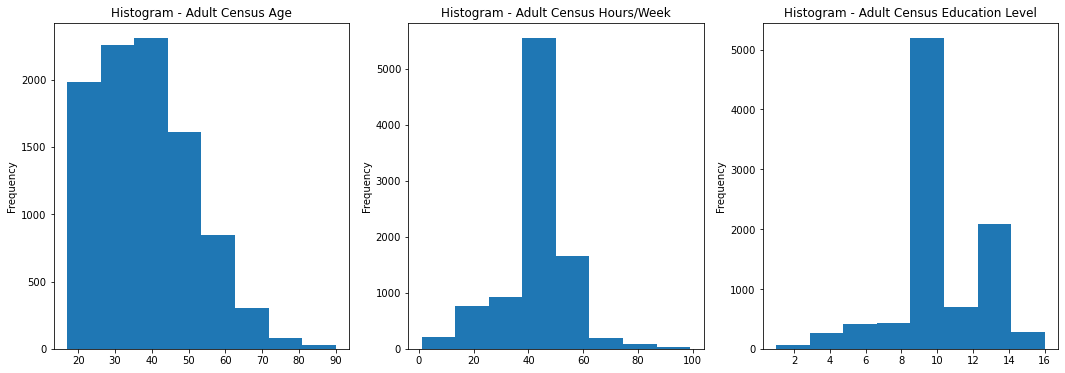

In [41]:
fig = plt.figure(figsize=(18,6))
ax1 = fig.add_subplot(131)
ax1.set_ylabel('Age in Years')
ax1.set_title('Histogram - Adult Census Age')
census_num["age"].plot(kind="hist", bins=8)

ax1 = fig.add_subplot(132)
ax1.set_ylabel('Hours/Week')
ax1.set_title('Histogram - Adult Census Hours/Week')
census_num["hours-per-week"].plot(kind="hist", bins=8)

ax1 = fig.add_subplot(133)
ax1.set_ylabel('Education Level')
ax1.set_title('Histogram - Adult Census Education Level')
census_num["education"].plot(kind="hist", bins=8)

### Scatterplot

<AxesSubplot:title={'center':'Age vs Hours/Week ScatterPlot'}, xlabel='age', ylabel='hours-per-week'>

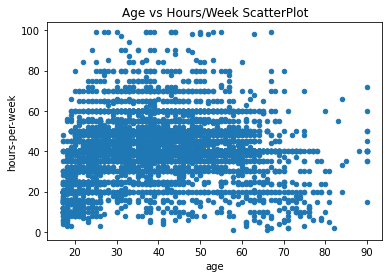

In [44]:
census_num.plot(x="age", y="hours-per-week", kind="scatter", title="Age vs Hours/Week ScatterPlot")

### Summary
In the box plots and histograms, we can see where the majority of the data lies for each numerical variable and the distributions. For age, we see that most of the data is in the range of people aged 30 - 50 with a few outliers above the whisker of 1.5 * IQR, while the histogram is showing a right-skewed normal distribution. In the hours-per-week variable, the majority of the data is highly concentrated between 40-50 hours per week, with outliers on both sides of the box plot, and a mostly normal distribution in the histogram. For education level, we see two peaks and a bimodal distribution in the histogram: one located at 9 years of education, and another at 13 or 14 years of education, probably for graduate/doctorate students. Lastly, we have the scatter plot showing age vs hours/week, which shows us a slight updward trend for hours worked for ages 20-50, and then a decline from 60-80.

# Problem #3
For the remaining categorical attributes create bar charts that show the distribution of category frequencies (e.g., married vs. single; private vs. public vs. self-emp; etc). Ideally, you should use bar charts in a single figure similar to this figure.

In [45]:
adult_census.head()

,age,workclass,education,marital-status,race,sex,hours-per-week,income
0,39,Public,13,Single,White,Male,40,<=50K
1,50,Self-emp,13,Married,White,Male,13,<=50K
2,38,Private,9,Single,White,Male,40,<=50K
3,53,Private,7,Married,Black,Male,40,<=50K
4,28,Private,13,Married,Black,Female,40,<=50K


### Bar Charts

<AxesSubplot:title={'center':'Bar Chart - Income Level'}, ylabel='Count'>

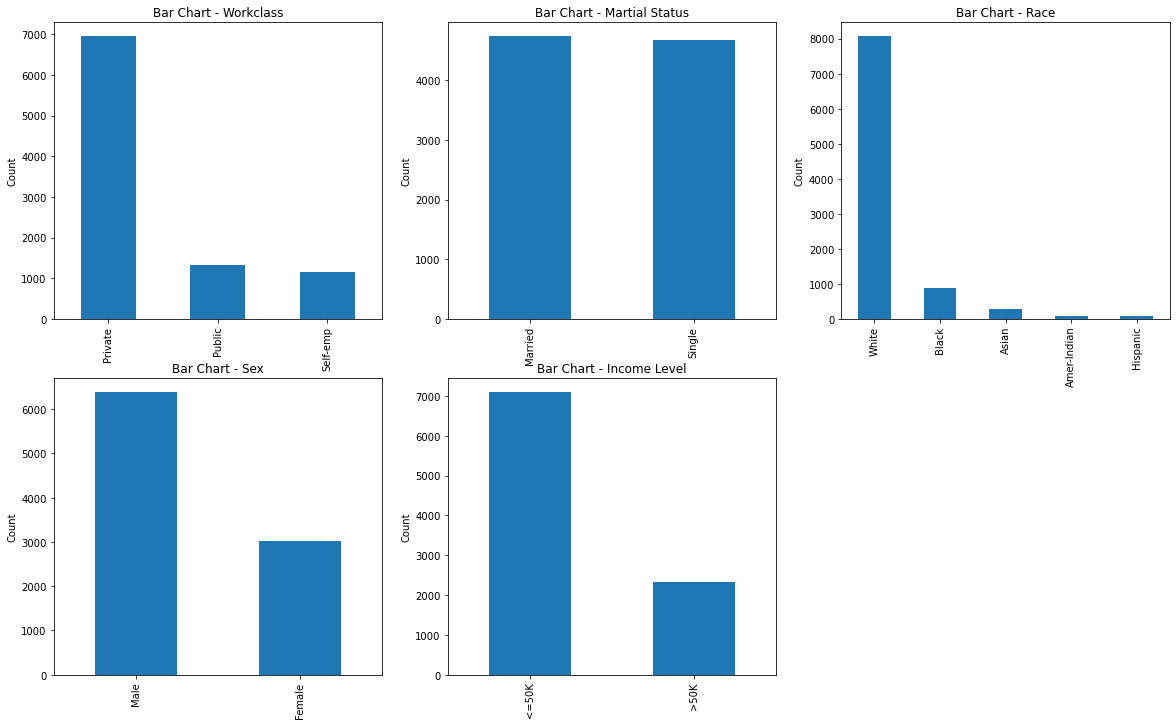

In [58]:
fig = plt.figure(figsize=(20,12))
ax1 = fig.add_subplot(231)
ax1.set_ylabel('Count')
ax1.set_title('Bar Chart - Workclass')
adult_census["workclass"].value_counts().plot(kind='bar')

ax1 = fig.add_subplot(232)
ax1.set_ylabel('Count')
ax1.set_title('Bar Chart - Martial Status')
adult_census["marital-status"].value_counts().plot(kind='bar')

ax1 = fig.add_subplot(233)
ax1.set_ylabel('Count')
ax1.set_title('Bar Chart - Race')
adult_census["race"].value_counts().plot(kind='bar')

ax1 = fig.add_subplot(234)
ax1.set_ylabel('Count')
ax1.set_title('Bar Chart - Sex')
adult_census["sex"].value_counts().plot(kind='bar')

ax1 = fig.add_subplot(235)
ax1.set_ylabel('Count')
ax1.set_title('Bar Chart - Income Level')
adult_census["income"].value_counts().plot(kind='bar')

### Summary
In each bar chart, we can see the frequency count for each of our categorical variables. For workclass, the majority of the data comes from people working in the private sector, for marital status, there are a fairly even number of single and married observations, for race, the majority of the observations are white, for sex, about twice as many males as females, and for income level, about 3x more observations making less than 50K.

# Problem #4
Perform a cross-tabulations of each of the workclass and race attributes with the income attribute. Show the resulting cross-tab tables as well as bar charts to visualize the relationships between these pairs of attributes. [Hint: you can use aggregation functions in Pandas such as groupby() and  cross-tab(), then either using Matplotlib directly or the plot() function in Pandas create the bar charts]. As an illustration, consider this graph depicting the cross-tabulation of sex with income. In the case of race vs. income cross-tab, create another chart comparing the percentages of each race category that fall in the low-income group.

### Race & Income Crosstab/Plot

In [78]:
race_income = pd.crosstab(adult_census['race'],adult_census['income'])
race_income

income,<=50K,>50K
race,,
Amer-Indian,83,9
Asian,224,67
Black,773,119
Hispanic,69,6
White,5944,2118


<AxesSubplot:title={'center':'Income Level by Race'}, xlabel='race', ylabel='Count'>

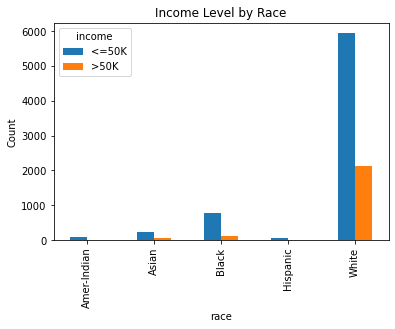

In [79]:
race_income.plot(kind="bar",title="Income Level by Race", ylabel="Count")

### Percentages of low income

In [80]:
race_income['%<=50K'] = race_income['<=50K'] / (race_income['<=50K'] + race_income['>50K'])
race_income

income,<=50K,>50K,%<=50K
race,,,
Amer-Indian,83,9,0.902174
Asian,224,67,0.769759
Black,773,119,0.866592
Hispanic,69,6,0.920000
White,5944,2118,0.737286


<AxesSubplot:title={'center':'Percent making less than 50K Income by Race'}, xlabel='race', ylabel='% <=50K'>

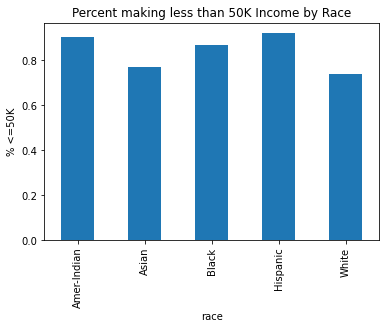

In [81]:
race_income['%<=50K'].plot(kind="bar",title="Percent making less than 50K Income by Race", ylabel="% <=50K")

### Workclass & Income Cross Tab/Plot

In [60]:
workclass_income = pd.crosstab(adult_census['workclass'],adult_census['income'])
workclass_income

income,<=50K,>50K
workclass,,
Private,5443,1504
Public,925,392
Self-emp,725,423


<AxesSubplot:title={'center':'Income Level by Work Class'}, xlabel='workclass', ylabel='Count'>

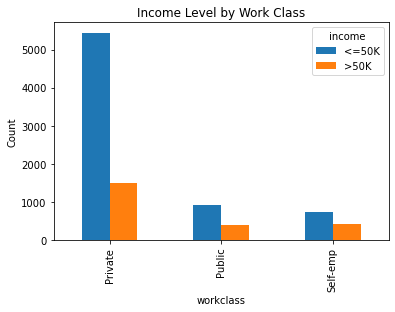

In [70]:
workclass_income.plot(kind="bar",title="Income Level by Work Class", ylabel="Count")

### Summary
For race & income, we output the crosstab and bar chart to visually see the differences each race has in respect to income. It is relatively hard to see for American Indians, Hispanics, and Asians since the sample size is relative small compared to the number of white observations. Then, we created a % making less than 50K by race to get a better picture of the income distribution by race. For white's and asians, they had around 70% of their respective races making less than 50K, indicating that their income levels are higher than that of American Indians, Blacks, and Hispanics, who all had over 80% making less than 50K. In our work class cross tab and bar chart, we see that self-employed individuals are generally making more money, and individuals in the private sector look to have the highest percentage making <=50K.

# Problem #5
Compare and contrast the characteristics of the low-income and high-income categories across the different attributes. You may consider first creating separate subsets of the data based on the income categories and then characterizing each subset by observing summary statistics for each group across different variables. Discuss your observations focusing specifically on unique characteristics that seem to distinguish among the two groups. You may (though you are not required to) use charts or plots for visualizing the differences in your analysis.

In [83]:
adult_census.head()

,age,workclass,education,marital-status,race,sex,hours-per-week,income
0,39,Public,13,Single,White,Male,40,<=50K
1,50,Self-emp,13,Married,White,Male,13,<=50K
2,38,Private,9,Single,White,Male,40,<=50K
3,53,Private,7,Married,Black,Male,40,<=50K
4,28,Private,13,Married,Black,Female,40,<=50K


In [103]:
low_income = adult_census[adult_census['income']=='<=50K']
low_income.head()

,age,workclass,education,marital-status,race,sex,hours-per-week,income
9406,34,Self-emp,11,Married,White,Male,75,<=50K
9408,25,Private,9,Single,White,Female,8,<=50K
9409,21,Private,10,Single,Black,Male,40,<=50K
9410,38,Private,2,Married,White,Male,53,<=50K
9411,39,Private,10,Single,White,Female,40,<=50K


In [102]:
low_income.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,7093,NaN,NaN,NaN,36.636,13.3391,17,26,35,45,90
workclass,7093,3,Private,5443,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,7093,NaN,NaN,NaN,9.64698,2.39736,1,9,9,10,16
marital-status,7093,2,Single,4363,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,7093,5,White,5944,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,7093,2,Male,4424,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hours-per-week,7093,NaN,NaN,NaN,39.567,11.8685,1,38,40,40,99
income,7093,1,<=50K,7093,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
high_income = adult_census[adult_census['income']=='>50K']
high_income.head()

,age,workclass,education,marital-status,race,sex,hours-per-week,income
7,52,Self-emp,9,Married,White,Male,45,>50K
8,31,Private,14,Single,White,Female,50,>50K
9,42,Private,13,Married,White,Male,40,>50K
10,37,Private,10,Married,Black,Male,80,>50K
11,30,Public,13,Married,Asian,Male,40,>50K


In [105]:
high_income.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,2319,NaN,NaN,NaN,43.6223,10.0477,19,36,43,50,90
workclass,2319,3,Private,1504,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,2319,NaN,NaN,NaN,11.5882,2.41076,2,9,12,13,16
marital-status,2319,2,Married,2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,2319,5,White,2118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,2319,2,Male,1959,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hours-per-week,2319,NaN,NaN,NaN,45.7085,10.6788,1,40,40,50,99
income,2319,1,>50K,2319,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
low_income_ct = pd.crosstab(low_income['sex'],adult_census['income'])
high_income_ct = pd.crosstab(high_income['sex'],adult_census['income'])

In [111]:
low_income_ct

income,<=50K
sex,
Female,2669
Male,4424


In [112]:
high_income_ct

income,>50K
sex,
Female,360
Male,1959


<AxesSubplot:title={'center':'Bar Chart - Low Income Earners by Sex'}, xlabel='sex', ylabel='Count'>

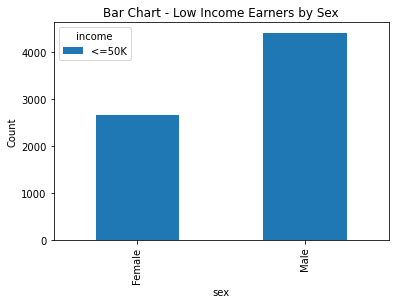

In [118]:
low_income_ct.plot(kind='bar',title='Bar Chart - Low Income Earners by Sex',ylabel='Count')

<AxesSubplot:title={'center':'Bar Chart - High Income Earners by Sex'}, xlabel='sex', ylabel='Count'>

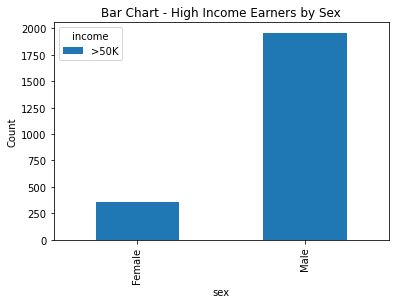

In [120]:
high_income_ct.plot(kind='bar',title='Bar Chart - High Income Earners by Sex',ylabel='Count')

### Summary
For the numerical variables, we see that a higher age is associated with higher income since the mean is 36.6 vs 43.6 for the higher income category. We see similar trends across the numeric variables, with education level having an average of 9.6 vs 11.5, and hours worked per week being 39.5 vs 45.7 for the higher income group. So the older, more educated, and harder working indviduals are typically above the 50K income threshold, while they younger, more inexperienced, working less hours individuals are under the 50K level.

Looking at the categorical variables, we see that married individuals make up the majority of the higher income subset (2007 out of 2319), while single individuals make up the lower income bracket (4363 out of 7093). While low and high income categories are dominated by men, upon further breakout in the bar charts I made, it is evident to see that females make up a higher % of the low income earners than they do in the high income earners.

# Problem #6
Convert the data into the standard spreadsheet format. Note that this requires converting each categorical attribute into multiple binary ("dummy") attributes (one for each values of the categorical attribute) and assigning binary values corresponding to the presence or not presence of the attribute value in the original record). The numeric attributes should remain unchanged. Save this data in a new dataframe and show the top 10 rows in the new dataframe. Also save this new table into a local file called adult_numeric.csv.

In [121]:
census_ssf = pd.get_dummies(adult_census)
census_ssf.head(10)

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male,income_<=50K,income_>50K
0,39,13,40,0,1,0,0,1,0,0,0,0,1,0,1,1,0
1,50,13,13,0,0,1,1,0,0,0,0,0,1,0,1,1,0
2,38,9,40,1,0,0,0,1,0,0,0,0,1,0,1,1,0
3,53,7,40,1,0,0,1,0,0,0,1,0,0,0,1,1,0
4,28,13,40,1,0,0,1,0,0,0,1,0,0,1,0,1,0
5,37,14,40,1,0,0,1,0,0,0,0,0,1,1,0,1,0
6,49,5,16,1,0,0,1,0,0,0,1,0,0,1,0,1,0
7,52,9,45,0,0,1,1,0,0,0,0,0,1,0,1,0,1
8,31,14,50,1,0,0,0,1,0,0,0,0,1,1,0,0,1
9,42,13,40,1,0,0,1,0,0,0,0,0,1,0,1,0,1


In [122]:
census_ssf.to_csv("Census_SSF.csv",float_format="%1.2f")

# Problem #7
Using the numeric data set with the dummy variables (of the previous part), perform basic correlation analysis among the attributes. You need to construct a complete Correlation Matrix (with rows and columns corresponding to each variable). [Hint: you can create the correlation matrix by using the corr() function in Pandas or corrcoef function in NumPy]. Next, using your correlation matrix, display in decreasing order of correlations, all attributes and their correlations to education. Repeat this step to display correlations with the attribute income_<=50K. Briefly discuss your general observations about this sample of adult population based on this correlation analysis.

In [123]:
corr_matrix = census_ssf.corr()
corr_matrix

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male,income_<=50K,income_>50K
age,1.000000,0.034733,0.103170,-0.202982,0.080254,0.187633,0.381168,-0.381168,-0.010904,-0.008097,-0.008668,-0.031973,0.022413,-0.071804,0.071804,-0.232261,0.232261
education,0.034733,1.000000,0.141730,-0.154977,0.154462,0.044472,0.050627,-0.050627,-0.039308,0.057360,-0.069029,-0.044845,0.051765,-0.008180,0.008180,-0.329066,0.329066
hours-per-week,0.103170,0.141730,1.000000,-0.097753,-0.021407,0.154025,0.183944,-0.183944,0.002964,0.000550,-0.071442,0.011964,0.055561,-0.221588,0.221588,-0.222686,0.222686
workclass_Private,-0.202982,-0.154977,-0.097753,1.000000,-0.677134,-0.625700,-0.121014,0.121014,-0.007136,-0.015060,0.004632,0.023490,-0.000389,0.072569,-0.072569,0.116453,-0.116453
workclass_Public,0.080254,0.154462,-0.021407,-0.677134,1.000000,-0.150335,-0.002351,0.002351,0.022185,0.012883,0.070250,-0.018927,-0.066491,0.045338,-0.045338,-0.047981,0.047981
workclass_Self-emp,0.187633,0.044472,0.154025,-0.625700,-0.150335,1.000000,0.165075,-0.165075,-0.013931,0.006576,-0.080694,-0.011495,0.071008,-0.145559,0.145559,-0.105593,0.105593
marital-status_Married,0.381168,0.050627,0.183944,-0.121014,-0.002351,0.165075,1.000000,-1.000000,-0.013614,0.017852,-0.104427,0.000605,0.082114,-0.357736,0.357736,-0.414173,0.414173
marital-status_Single,-0.381168,-0.050627,-0.183944,0.121014,0.002351,-0.165075,-1.000000,1.000000,0.013614,-0.017852,0.104427,-0.000605,-0.082114,0.357736,-0.357736,0.414173,-0.414173
race_Amer-Indian,-0.010904,-0.039308,0.002964,-0.007136,0.022185,-0.013931,-0.013614,0.013614,1.000000,-0.017746,-0.032148,-0.008905,-0.242795,0.021711,-0.021711,0.034254,-0.034254
race_Asian,-0.008097,0.057360,0.000550,-0.015060,0.012883,0.006576,0.017852,-0.017852,-0.017746,1.000000,-0.057795,-0.016009,-0.436496,0.001773,-0.001773,0.006693,-0.006693


In [124]:
corr_matrix["education"].sort_values(ascending=False)

education                 1.000000
income_>50K               0.329066
workclass_Public          0.154462
hours-per-week            0.141730
race_Asian                0.057360
race_White                0.051765
marital-status_Married    0.050627
workclass_Self-emp        0.044472
age                       0.034733
sex_Male                  0.008180
sex_Female               -0.008180
race_Amer-Indian         -0.039308
race_Hispanic            -0.044845
marital-status_Single    -0.050627
race_Black               -0.069029
workclass_Private        -0.154977
income_<=50K             -0.329066
Name: education, dtype: float64

In [126]:
corr_matrix["income_<=50K"].sort_values(ascending=False)

income_<=50K              1.000000
marital-status_Single     0.414173
sex_Female                0.203886
workclass_Private         0.116453
race_Black                0.084836
race_Hispanic             0.034607
race_Amer-Indian          0.034254
race_Asian                0.006693
workclass_Public         -0.047981
race_White               -0.092589
workclass_Self-emp       -0.105593
sex_Male                 -0.203886
hours-per-week           -0.222686
age                      -0.232261
education                -0.329066
marital-status_Married   -0.414173
income_>50K              -1.000000
Name: income_<=50K, dtype: float64

### Summary
Looking at the correlation values for education and income <=50K, we can observe some interesting things. For education, there is a positive correlation with income >50K and weaker positive correlations with hours worked and working in the public sector. There is also a negative correlation with income <=50K, and working in the private sector. For income <=50K and its correlations, we see that there is a positive correlation between individuals that are single, and to a lesser extent female. On the opposite end, we have individuals that are married as well as education, which makes sense intuitively since married folks file joint incomes and people with a higher education generally make more money.

# Problem #8
Discretize the age attribute into 3 categories (corresponding to "young", "mid-age", and "old"). Do not change the original age attribute or add the discretized age to the table. Create a new dataframe with the numeric and the discretized age attributes as two columns and display the top 10 rows of the new dataframe.

In [131]:
age_bins = pd.qcut(adult_census['age'],[0,.33,.66,1], labels=["young","mid-age","old"])
age_bins.head(10)

0    mid-age
1        old
2    mid-age
3        old
4      young
5    mid-age
6        old
7        old
8      young
9    mid-age
Name: age, dtype: category
Categories (3, object): ['young' < 'mid-age' < 'old']

In [138]:
age_df = pd.DataFrame(age_bins)
age_df['age_num'] = adult_census['age']
age_df.head(10)

,age,age_num
0,mid-age,39
1,old,50
2,mid-age,38
3,old,53
4,young,28
5,mid-age,37
6,old,49
7,old,52
8,young,31
9,mid-age,42


# Problem #9
Use Min-Max Normalization to transform the values of the attribute hours-per-week the range 0.0-1.0 (without changing the original data). Next, perform zscore normalization to standardize the values of all numeric attributes (age, hours-per-week, education). The latter step should be performed on all three attributes at the same time instead of one-by-one (you may wish to first create a separate dataframe with only these attributes and perform the operation on the whole dataframe. Note: for this problem, you should write your own code to perform the normalization; do not use pre-existing functions such as scikit-learn's MinMaxScaler(). Finally, show the top 10 rows of the three versions of the hours-per-week attribute (original, normalized, and standardized) side-by-side in a new dataframe.

### Min/Max Normalization

In [140]:
min_hrs = adult_census['hours-per-week'].min()
max_hrs = adult_census['hours-per-week'].max()

In [141]:
norm_hrs = (adult_census["hours-per-week"] - min_hrs) / (max_hrs - min_hrs)
norm_hrs

0       0.397959
1       0.122449
2       0.397959
3       0.397959
4       0.397959
          ...   
9407    0.602041
9408    0.071429
9409    0.397959
9410    0.530612
9411    0.397959
Name: hours-per-week, Length: 9412, dtype: float64

### Z score Normalization

In [150]:
zscore = lambda x: (x-x.mean()) / x.std()
census_std = census_num.apply(zscore)
census_std.head()

,age,hours-per-week,education
0,0.049582,-0.090892,1.130842
1,0.898208,-2.362742,1.130842
2,-0.027566,-0.090892,-0.442649
3,1.129651,-0.090892,-1.229394
4,-0.799044,-0.090892,1.130842


In [151]:
hpw_df = pd.DataFrame(adult_census['hours-per-week'])
hpw_df['hpw_norm'] = norm_hrs
hpw_df['hpw_std'] = census_std['hours-per-week']
hpw_df.head(10)

,hours-per-week,hpw_norm,hpw_std
0,40,0.397959,-0.090892
1,13,0.122449,-2.362742
2,40,0.397959,-0.090892
3,40,0.397959,-0.090892
4,40,0.397959,-0.090892
5,40,0.397959,-0.090892
6,16,0.153061,-2.110314
7,45,0.448980,0.329821
8,50,0.500000,0.750534
9,40,0.397959,-0.090892


# Problem #10
Now download a modified version of the data  (adult-modified-missing-vals.csv) that contains missing values. (a) Using Pandas determine all the attributes with missing values and the number of missing values for each such attribute. (b) Show all the instances in the data that contain a missing value. (c) Fill the missing values for all numeric attributes using the mean value for the attribute. (d) After filling in the missing numeric values, drop all rows where a categorical attribute contains a missing value. (e) Show that the final resulting table does not contain missing values.

In [161]:
adult_census2 = pd.read_csv('adult-modified-missing-vals.csv',na_values=["?"])
adult_census2.shape

(10000, 8)

### a.)

In [162]:
adult_census2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             9802 non-null   float64
 1   workclass       9412 non-null   object 
 2   education       10000 non-null  int64  
 3   marital-status  10000 non-null  object 
 4   race            10000 non-null  object 
 5   sex             10000 non-null  object 
 6   hours-per-week  10000 non-null  int64  
 7   income          10000 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 625.1+ KB


In [164]:
adult_census2.head(25)

,age,workclass,education,marital-status,race,sex,hours-per-week,income
0,39.0,Public,13,Single,White,Male,40,<=50K
1,50.0,Self-emp,13,Married,White,Male,13,<=50K
2,38.0,Private,9,Single,White,Male,40,<=50K
3,53.0,Private,7,Married,Black,Male,40,<=50K
4,28.0,Private,13,Married,Black,Female,40,<=50K
5,37.0,Private,14,Married,White,Female,40,<=50K
6,49.0,Private,5,Married,Black,Female,16,<=50K
7,52.0,Self-emp,9,Married,White,Male,45,>50K
8,31.0,Private,14,Single,White,Female,50,>50K
9,42.0,Private,13,Married,White,Male,40,>50K


### Summary
The variables with missing data are the age and workclass variables. We can see this by using the .info() method on the dataframe. For age, we are missing 198 values, and for workclass, we are missing 588 values.

### b.)

In [165]:
all_nulls = adult_census2[adult_census2.isnull().any(axis=1)]
all_nulls.head(10)

,age,workclass,education,marital-status,race,sex,hours-per-week,income
19,NaN,Self-emp,14,Single,White,Female,45,>50K
27,NaN,NaN,10,Married,Asian,Male,60,>50K
40,NaN,Private,5,Married,White,Male,43,<=50K
61,32.0,NaN,4,Married,White,Male,40,<=50K
65,NaN,Private,9,Married,White,Male,40,<=50K
69,25.0,NaN,10,Single,White,Male,40,<=50K
77,67.0,NaN,6,Married,White,Male,2,<=50K
80,NaN,Private,9,Single,White,Male,30,<=50K
89,NaN,Public,16,Single,White,Female,50,>50K
95,NaN,Public,10,Single,White,Male,50,<=50K


### c.)

In [167]:
age_mean = adult_census2['age'].mean()
adult_census2['age'].fillna(age_mean,axis=0,inplace=True)
adult_census2.head(25)

,age,workclass,education,marital-status,race,sex,hours-per-week,income
0,39.000000,Public,13,Single,White,Male,40,<=50K
1,50.000000,Self-emp,13,Married,White,Male,13,<=50K
2,38.000000,Private,9,Single,White,Male,40,<=50K
3,53.000000,Private,7,Married,Black,Male,40,<=50K
4,28.000000,Private,13,Married,Black,Female,40,<=50K
5,37.000000,Private,14,Married,White,Female,40,<=50K
6,49.000000,Private,5,Married,Black,Female,16,<=50K
7,52.000000,Self-emp,9,Married,White,Male,45,>50K
8,31.000000,Private,14,Single,White,Female,50,>50K
9,42.000000,Private,13,Married,White,Male,40,>50K


### d.)

In [170]:
adult_census2.drop(adult_census2[adult_census2.workclass.isnull()].index, axis=0,inplace=True)

### e.)

In [172]:
adult_census2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9412 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             9412 non-null   float64
 1   workclass       9412 non-null   object 
 2   education       9412 non-null   int64  
 3   marital-status  9412 non-null   object 
 4   race            9412 non-null   object 
 5   sex             9412 non-null   object 
 6   hours-per-week  9412 non-null   int64  
 7   income          9412 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 661.8+ KB
